### Wstęp do Uczenia Maszynowego 
##### Laboratorium 3


### 4. Podsumowanie, czyli co warto wiedzieć...

1. Jak definiujemy problem klasyfikacji?
2. Podział zbioru na treningowy, walidacyjny i testowy.
2. Miary dokładności klasyfikatorów:

    a) macierz pomyłek (*ang. confusion matrix*),

    b) dokładność, czułość, precyzja, (*ang. accuracy, recall, precision*)

    c) krzywa ROC,

    d) AUC.


3. Kroswalidacja (*ang. cross validation*)
4. Drzewa decyzyjne:

    a) wady i zalety,

    b) jak budujemy drzewo,

    b) jakie mamy miary podziału,
    
    d) przycinanie drzew.

##### Laboratorium 4

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression

## 1. Model regresji liniowej

In [57]:
hills = pd.read_csv("hills.csv")

### Zadanie 1 
------
Dla danych `hills.csv`:

a) Narysuj wykres rozproszenia zmiennej *time* od *dist* oraz *time* od *climb*.

b) Oblicz współczynnik korelacji.


<Axes: xlabel='climb', ylabel='time'>

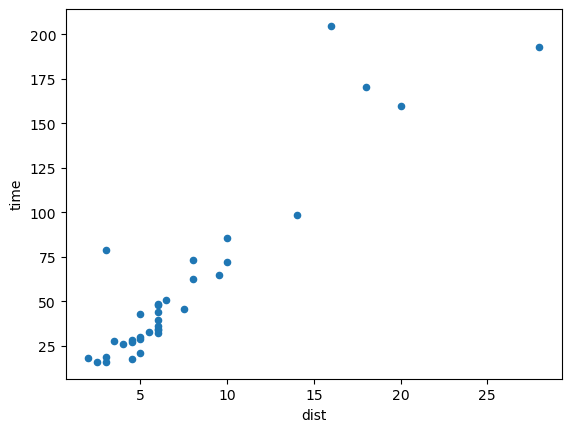

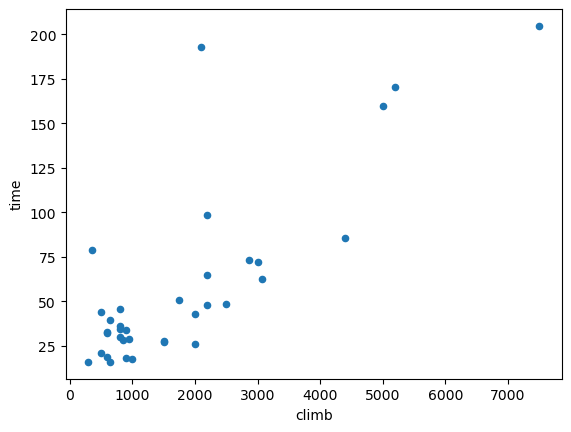

In [58]:
hills.plot.scatter(x = 'dist', y = 'time')
hills.plot.scatter(x = 'climb', y = 'time')

In [59]:
hills[['dist', 'time', 'climb']].corr()

dist      time     climb
dist   1.000000  0.919589  0.652346
time   0.919589  1.000000  0.805239
climb  0.652346  0.805239  1.000000

### 1.1 Budujemy model regresji liniowej dla pary zmiennych dist i time

In [60]:
y = hills.time
X = hills.drop(["time", "Unnamed: 0", 'climb'], axis = 1)

lm = LinearRegression()
lm = lm.fit(X, y)


In [61]:
lm.coef_

array([8.33045619])

In [62]:
lm.intercept_

-4.840720185065344

### Zadanie 2
----
Na wykresie rozproszenia zaznacz wyestymowaną prostą z modelu liniowego.

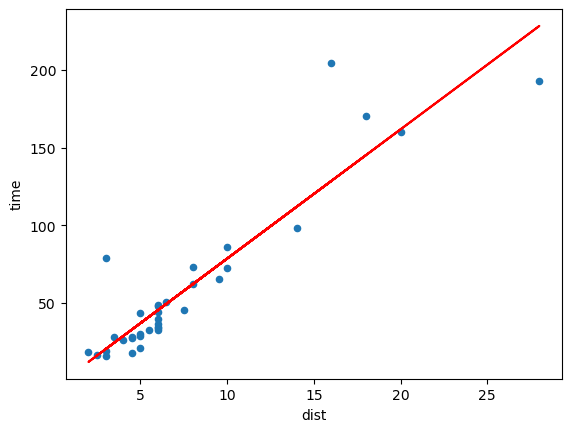

In [63]:
hills.plot.scatter(x = 'dist', y = 'time')
plt.plot(hills.dist, hills.dist*lm.coef_ + lm.intercept_, 'red')

### Zadanie 3
Zbuduj model regresji liniowej wyliczający zależność *time* od *climb*, wyznacz współczynniki, narysuj wykres rozproszenie i zaznacz wyestymowaną prostą.

In [64]:
y = hills.time
X = hills.drop(["time", "Unnamed: 0", 'dist'], axis = 1)

lm = LinearRegression()
lm = lm.fit(X, y)


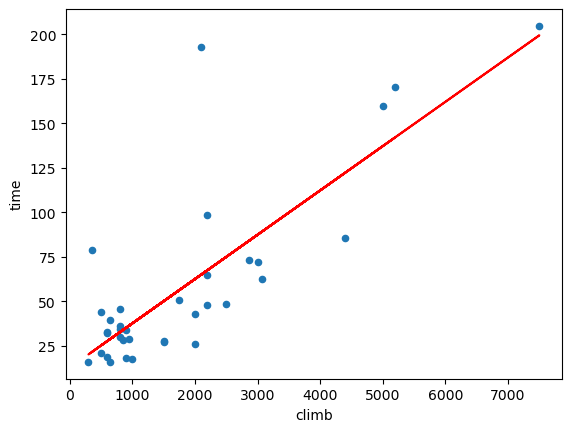

In [65]:
hills.plot.scatter(x = 'climb', y = 'time')
plt.plot(hills.climb, hills.climb*lm.coef_ + lm.intercept_, 'red')

## 2. Model regresji logistycznej

In [66]:
df = pd.read_csv("SAheart.data")

### Zadanie 4
----
Przygotuj zbiór danych `SAheart.data` do dalszej pracy.


In [67]:
df = pd.get_dummies(df)

In [68]:
df = df.drop(['row.names'], axis = 1)

In [69]:
from sklearn.model_selection import train_test_split

In [70]:
y = df.chd
X = df.drop(['chd'], axis = 1)

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

### Zadanie 5
a) Dopasuj model regresji logistycznej do danych `SAheart.data`.

b) Oblicz prawdopodobieństw przynależności do klasy 1 dla zbioru testowego:

  - metodą `decision_function` oraz odwrotnością funkcji logitowej
    
  - metodą `predict_proba`

c) Dokonaj predykcji dla obserwacji o wartości `sbp = 127`, `age = 30`, `alcohol = 0`, `obesity = 25`, `typea = 49`, `famhist = 'Present'`, `tobbaco = 0`, `ldl = 4.44`, `adiposity = 18`.

In [72]:
lm = LogisticRegression(penalty=None, max_iter =300)
lm.fit(X_train, y_train)

LogisticRegression(max_iter=300, penalty=None)

In [73]:
lm.coef_

array([[ 5.86568954e-03,  9.06464497e-02,  2.49609217e-01,
         3.77238802e-02,  2.66710130e-02, -7.20665769e-02,
         5.16181275e-04,  4.00000713e-02, -2.28321707e+00,
        -1.34996211e+00]])

In [74]:
lm.predict_proba(X_test)[:,1]

array([0.28689662, 0.68618695, 0.4343795 , 0.06552727, 0.02468079,
       0.12455181, 0.72196418, 0.13271824, 0.14395873, 0.12034307,
       0.58078912, 0.70923394, 0.0340159 , 0.5747523 , 0.59188975,
       0.03429197, 0.16478938, 0.32661133, 0.44102833, 0.55612756,
       0.04849016, 0.03406314, 0.06111828, 0.12417395, 0.20878026,
       0.10479191, 0.17743433, 0.47233229, 0.87939893, 0.34587964,
       0.18521736, 0.02595571, 0.08233528, 0.57659744, 0.1834393 ,
       0.28791565, 0.69780548, 0.09948082, 0.19472337, 0.08264633,
       0.20220319, 0.3684343 , 0.08674734, 0.16754432, 0.18199815,
       0.73020241, 0.46758667, 0.40180998, 0.12184876, 0.14746504,
       0.22194119, 0.03039686, 0.12917279, 0.34979985, 0.7348699 ,
       0.16454573, 0.70740791, 0.20994545, 0.09914409, 0.51301836,
       0.44112691, 0.30224621, 0.78223999, 0.03661021, 0.72683817,
       0.25258774, 0.11353346, 0.12293732, 0.08751937, 0.33755841,
       0.04261827, 0.43819407, 0.41968814, 0.1276235 , 0.53480

In [75]:
np.exp(lm.decision_function(X_test))/(1 + np.exp(lm.decision_function(X_test)))

array([0.28689662, 0.68618695, 0.4343795 , 0.06552727, 0.02468079,
       0.12455181, 0.72196418, 0.13271824, 0.14395873, 0.12034307,
       0.58078912, 0.70923394, 0.0340159 , 0.5747523 , 0.59188975,
       0.03429197, 0.16478938, 0.32661133, 0.44102833, 0.55612756,
       0.04849016, 0.03406314, 0.06111828, 0.12417395, 0.20878026,
       0.10479191, 0.17743433, 0.47233229, 0.87939893, 0.34587964,
       0.18521736, 0.02595571, 0.08233528, 0.57659744, 0.1834393 ,
       0.28791565, 0.69780548, 0.09948082, 0.19472337, 0.08264633,
       0.20220319, 0.3684343 , 0.08674734, 0.16754432, 0.18199815,
       0.73020241, 0.46758667, 0.40180998, 0.12184876, 0.14746504,
       0.22194119, 0.03039686, 0.12917279, 0.34979985, 0.7348699 ,
       0.16454573, 0.70740791, 0.20994545, 0.09914409, 0.51301836,
       0.44112691, 0.30224621, 0.78223999, 0.03661021, 0.72683817,
       0.25258774, 0.11353346, 0.12293732, 0.08751937, 0.33755841,
       0.04261827, 0.43819407, 0.41968814, 0.1276235 , 0.53480

In [76]:
X_train

sbp  tobacco    ldl  adiposity  typea  obesity  alcohol  age  \
125  123     8.60  11.17      35.28     70    33.14     0.00   59   
180  166     0.00   4.31      34.27     45    30.14    13.27   56   
345  198     0.52  11.89      27.68     48    28.40    78.99   26   
23   138     0.60   3.81      28.66     54    28.70     1.46   58   
361  124     0.40   3.67      25.76     43    28.08    20.57   34   
..   ...      ...    ...        ...    ...      ...      ...  ...   
6    142     4.05   3.38      16.20     59    20.81     2.62   38   
197  162     2.92   3.63      31.33     62    31.59    18.51   42   
93   118     4.00   3.95      18.96     54    25.15     8.33   49   
242  190     4.18   5.05      24.83     45    26.09    82.85   41   
181  152     0.00   6.06      41.05     51    40.34     0.00   51   

     famhist_Absent  famhist_Present  
125               0                1  
180               1                0  
345               0                1  
23                1                0  
361               1                0  
..              ...              ...  
6                 1                0  
197               1                0  
93                1                0  
242               1                0  
181               0                1  

[323 rows x 10 columns]

In [77]:
new_obs = pd.DataFrame({'sbp': [127],
                        'tobacco' : [0], 
                        'ldl' : [4.44],
                        'adiposity' : [18],
                        'typea' : [49],
                        'obesity': [25],
                        'alcohol': [0], 
                        'age': [30],
                        'famhist_Absent': [0],
                        'famhist_Present': [1],
                        })

In [78]:
lm.predict_proba(new_obs)

array([[0.85140793, 0.14859207]])

### Zadanie 6
-----
Weźmy pod uwagę dane `earthquake.csv`, które dotyczą klasyfikacji wstrząsów (zmienna *popn*). Zmienne objaśniające to zmienne *body* i *surface* (zmienne sejsmologiczne).

a) Wykonaj wykres dla zmiennych *body* i *surface* z zaznaczeniem przynależności do klas.

b) Dopasuj modej regresji logistycznej. 

c) Interpretacja współczynników.

In [79]:
earthquake = pd.read_csv("earthquake.txt", sep=" ")